In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [217]:
df = pd.read_csv('carprice.csv')
df.head()

data = df.copy()

In [218]:
df = df.dropna()

### Categoric to number factor

In [253]:
df["fueltype"] = df["fueltype"].astype('category')
df["aspiration"] = df["aspiration"].astype('category')
df["doornumber"] = df["doornumber"].astype('category')
df["carbody"] = df["carbody"].astype('category')
df["drivewheel"] = df["drivewheel"].astype('category')
df["enginelocation"] = df["enginelocation"].astype('category')
df["fuelsystem"] = df["fuelsystem"].astype('category')
df["enginetype"] = df["enginetype"].astype('category')
df["cylindernumber"] = df["cylindernumber"].astype('category')

df.fueltype = df.fueltype.cat.codes
df.aspiration = df.aspiration.cat.codes
df.doornumber = df.doornumber.cat.codes
df.carbody = df.carbody.cat.codes
df.drivewheel = df.drivewheel.cat.codes
df.enginelocation = df.enginelocation.cat.codes
df.fuelsystem = df.fuelsystem.cat.codes
df.enginetype = df.enginetype.cat.codes
df.cylindernumber = df.cylindernumber.cat.codes
df.dtypes

car_ID                 int64
symboling              int64
CarName               object
fueltype            category
aspiration              int8
doornumber              int8
carbody                 int8
drivewheel              int8
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype              int8
cylindernumber          int8
enginesize             int64
fuelsystem              int8
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object

### Correlation

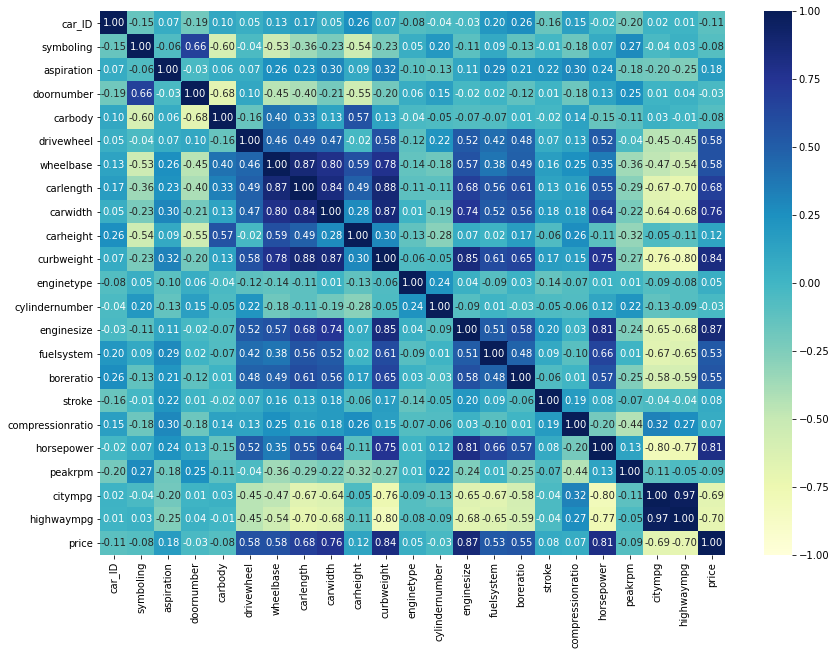

In [254]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

### Split dataset

In [255]:
X = df.drop(['car_ID', 'CarName', 'price'], axis = 1)
y = df[['price']]

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state = 46)

### Training model

In [276]:
model_lr = LinearRegression()
model_lr.fit(X_train.values, Y_train.values)

pred = model_lr.predict(X_test)
pred_train = model_lr.predict(X_train)

In [279]:
print('Coefficients: \n', model_lr.coef_)
# The mean squared error
print('MSE test: %f' % mean_squared_error(Y_test, pred))
print('MSE train: %f' % mean_squared_error(Y_train, pred_train))
# The coefficient of determination: 1 is perfect prediction
print('R² test: %f' % r2_score(Y_test, pred))
print('R² train: %f' % r2_score(Y_train, pred_train))

Coefficients: 
 [[-7.63989693e+01 -1.49202566e+04 -4.21913941e+02 -4.61000096e+02
  -7.20002936e+02  1.75329574e+03  1.07408401e+04  5.50715449e+01
  -6.03925837e+01  6.99789746e+02  1.33052083e+02  4.57347099e+00
   5.13451903e+02  3.01580619e+02  9.46244879e+01 -1.46112153e+02
  -2.10724236e+03 -3.07421875e+03 -8.95389109e+02  1.30008972e+01
   2.34547573e+00 -2.61276616e+02  3.41106953e+02]]
MSE test: 12249365.852051
MSE train: 6679970.882164
R² test: 0.836865
R² train: 0.885290


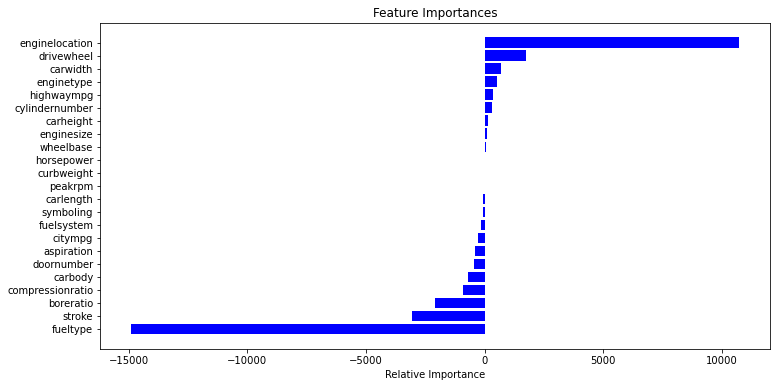

In [281]:
imp = model_lr.coef_[0]
features = X_train.columns
indices = np.argsort(imp)
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

TypeError: Categorical cannot perform the operation var

Error in callback <function flush_figures at 0x00000175802FC280> (for post_execute):


KeyboardInterrupt: 